In [203]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [204]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [205]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [206]:
print(data[:5])

[[0.03431412]
 [0.03423395]
 [0.07784815]
 [0.12290548]
 [0.09540608]]


In [207]:
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [208]:
print(f"스케일링된 전체 데이터 형태: {data.shape}")
print(f"훈련용 데이터 형태: {train_data.shape}")
print(f"테스트용 데이터 형태: {test_data.shape}")

스케일링된 전체 데이터 형태: (325, 1)
훈련용 데이터 형태: (260, 1)
테스트용 데이터 형태: (65, 1)


In [209]:
window = 12   # 최근 12개월 → 다음달 예측
def create_sequences(data, window):
  X, y = [], []
  for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
  return np.array(X), np.array(y)

In [210]:
X_train, y_train = create_sequences(train_data, window)
X_test, y_test = create_sequences(test_data, window)

In [211]:
def build_rnn_model(input_shape):
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        SimpleRNN(32),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [212]:
def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1)
    ])
    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

In [213]:
# 모델 생성
input_shape = (window, 1)
model_rnn = build_rnn_model(input_shape)
model_lstm = build_lstm_model(input_shape)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [214]:
model_rnn.fit(X_train, y_train, epochs=30, batch_size=8, verbose=1)

Epoch 1/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3481
Epoch 2/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0196
Epoch 3/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0102
Epoch 4/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095
Epoch 5/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069
Epoch 6/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0059
Epoch 7/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050
Epoch 8/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0055
Epoch 9/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0045
Epoch 10/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0039
Epoch 11/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0040
Epoch 12/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034
Epoch 13/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032
Epoch 14/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0032
Epoch 15/30
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037
Epoch 16/30
31/31 ━

In [220]:
model_lstm.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0049
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0049
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0056
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0055
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0066
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0043
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057
Epoch 13/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055
Epoch 14/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058
Epoch 15/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055
Epoch 16/50
31/31 

In [221]:
def evaluate_model_scaled(model, X, y_true):
    y_pred_scaled = model.predict(X)

    mse = mean_squared_error(y_true, y_pred_scaled)
    rmse = np.sqrt(mse)
    return y_pred_scaled, mse, rmse

In [222]:
# 각 모델 평가
train_pred_rnn_scaled, train_mse_rnn, train_rmse_rnn = evaluate_model_scaled(model_rnn, X_train, y_train)
test_pred_rnn_scaled, test_mse_rnn, test_rmse_rnn = evaluate_model_scaled(model_rnn, X_test, y_test)

train_pred_lstm_scaled, train_mse_lstm, train_rmse_lstm = evaluate_model_scaled(model_lstm, X_train, y_train)
test_pred_lstm_scaled, test_mse_lstm, test_rmse_lstm = evaluate_model_scaled(model_lstm, X_test, y_test)

print("\n--- Model Evaluation (Scaled Data) ---")
print(f"SimpleRNN Train MSE:  {train_mse_rnn:.6f}, RMSE: {train_rmse_rnn:.6f}")
print(f"SimpleRNN Test MSE:   {test_mse_rnn:.6f}, RMSE: {test_rmse_rnn:.6f}")
print(f"LSTM Train MSE:       {train_mse_lstm:.6f}, RMSE: {train_rmse_lstm:.6f}")
print(f"LSTM Test MSE:        {test_mse_lstm:.6f}, RMSE: {test_rmse_lstm:.6f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

--- Model Evaluation (Scaled Data) ---
SimpleRNN Train MSE:  0.001086, RMSE: 0.032948
SimpleRNN Test MSE:   0.012356, RMSE: 0.111159
LSTM Train MSE:       0.004107, RMSE: 0.064086
LSTM Test MSE:        0.012577, RMSE: 0.112147


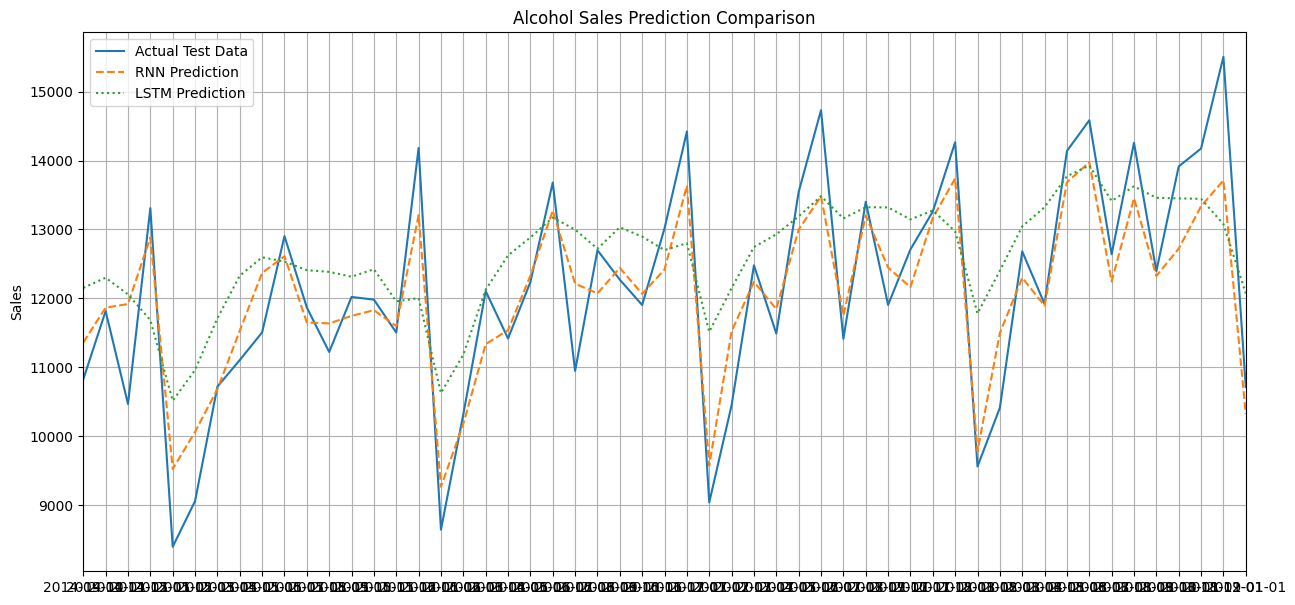

In [223]:
plt.figure(figsize=(15, 7))
plt.title('Alcohol Sales Prediction Comparison')
plt.ylabel('Sales')
plt.grid(True)
plt.autoscale(axis='x', tight=True)

test_dates = df['DATE'][train_size + window:]
plt.plot(test_dates, scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Test Data')
plt.plot(test_dates, test_pred_rnn, label='RNN Prediction', linestyle='--')
plt.plot(test_dates, test_pred_lstm, label='LSTM Prediction', linestyle=':')
plt.legend()
plt.show()